# SportsStats (Olympics Dataset - 120 years of data)

This project proposal is for a team to improve their business process metrics based on the results. The results will be useful for sportswear, sports equipment or any other manufacturing industry in the sports area, to see the insights in data and to develop, promote their sports products. From the results the industry can focus more on the relevent key areas to improve their business.

Later in the project sqldf is imported from pandasql. The data set information was explored further using SQL and pandas.

### Questions

1. The percentage of winning gold medals from South Asian countries?.

   *To understand the performance of South Asian Country participants in Olympic games.


2. Average Height and Weight of the winning participants to win a medal?.

   *Gain more insights to the participants structure.      
   *To understand the average value of height and weight of the participants?.


3. What is the most popular age group to participate in Olympic games.

### Hypothesis

4. There is similar participants counts from males and females.
   
   *Just a hypothesis that both sex participants will be similar.


5. There is lower percentage of the gold medallists from South Asian countries.
  
   *As most of the countries are developing countries the focus on Sports establishment will be less.
   
   *These countries will have less facilities for sports.
       
       
6. The country to win highest number of medals will be USA.

   *There will be more facilities for sports practice, therefore more participants and medallists.



In [14]:
import pandas as pd
import numpy as np
import os

In [10]:
pwd

'C:\\Users\\Hasini'

In [11]:
cd C:\\Users\\Hasini

C:\Users\Hasini


In [12]:
olympics = pd.read_csv("athlete_events.csv")

The csv file was read using pandas and the first five rows of the data was retrieved. The data set consists of the columns shown below.

In [6]:
olympics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The columns were explored using histogram

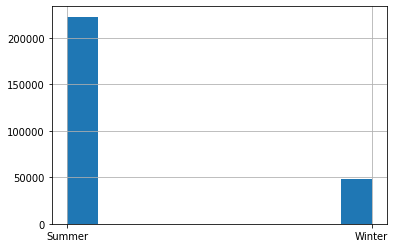

In [15]:
olympics.Season.hist()

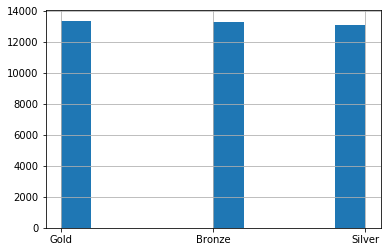

In [16]:
olympics.Medal.hist()

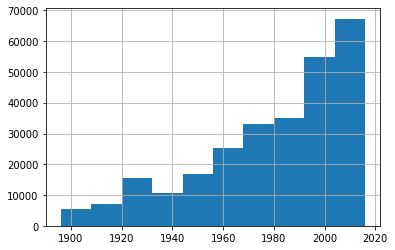

In [17]:
olympics.Year.hist()

In [21]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())


## 1. The percentage of winning gold medals from South Asian countries?

South Asian Countries are India, Sri Lanka, Pakistan, Nepal, Afghanistan, Bangladesh, Bhutan, and Maldives. The percentage of South Asian coutries to win a medal and to win a gold medal is checked as shown below.

In [26]:
pysqldf("SELECT COUNT(*) Total_count FROM olympics WHERE Medal IN ('Gold','Silver','Bronze')")

,Total_count
0,39783


In [27]:
pysqldf(
    "SELECT ROUND((CAST(COUNT(*) AS FLOAT)/39783)*100,2) AS Asian_Medal_per FROM olympics WHERE Team IN ('India','Sri Lanka','Pakistan','Afghanistan','Bangladesh','Bhutan','Maldives','Nepal') AND Medal IN ('Gold','Silver','Bronze')")

,Asian_Medal_per
0,0.81


In [28]:
pysqldf("SELECT COUNT(*) Total_count FROM olympics WHERE Medal IN ('Gold')")

,Total_count
0,13372


In [29]:
pysqldf(
    "SELECT ROUND((CAST(COUNT(*) AS FLOAT)/13372)*100,2) AS Asian_gold_per FROM olympics WHERE Team IN ('India','Sri Lanka','Pakistan','Afghanistan','Bangladesh','Bhutan','Maldives','Nepal') AND Medal IN ('Gold')")

,Asian_gold_per
0,1.35


Gold medal percentage from United states is calculated as below.

In [30]:
pysqldf(
    "SELECT ROUND((CAST(COUNT(*) AS FLOAT)/13372)*100,2) AS USA_Medal_per FROM olympics WHERE Team IN ('United States') AND Medal IN ('Gold')")

,USA_Medal_per
0,18.5


## 2. Average Height and Weight of the winning participants to win a medal?

In [31]:
pysqldf("SELECT AVG(Height), AVG(Weight) FROM olympics WHERE Medal IN ('Gold','Silver','Bronze') AND Height !='Nan' AND Weight !='Nan'")

,AVG(Height),AVG(Weight)
0,177.639389,73.750364


From the analysis it is clear that its not a correct approach to calculate the average of the height and weight from all the participants. It should be calculated for different sports and events.
Then average hieght and weight was calculated for the Women's High Jump as shown below.

In [32]:

pysqldf("SELECT AVG(Height), AVG(Weight) FROM olympics WHERE Medal IN ('Gold','Silver','Bronze') AND Sport = 'Athletics' AND Event LIKE ('Athletics Women%High Jump') AND Height != 'Nan' AND Weight != 'Nan'")

,AVG(Height),AVG(Weight)
0,177.919355,62.290323


The result for Women's height and weight is 177.919cm and 62.29Kg.

## 3. What is the most popular age group to participate in Olympic games

In [35]:
pysqldf("SELECT Sex, Age, COUNT(*) AS count FROM olympics GROUP BY 1,2 ORDER BY 3 DESC")

,Sex,Age,count
0,M,24.0,16429
1,M,23.0,16428
2,M,22.0,15398
3,M,25.0,14757
4,M,21.0,13653
...,...,...,...
133,M,10.0,1
134,M,11.0,1
135,M,84.0,1
136,M,96.0,1


In [36]:
pysqldf("SELECT Sex, Age, COUNT(*) AS count FROM olympics GROUP BY 1,2 HAVING Sex = 'F' ORDER BY 3 DESC")

,Sex,Age,count
0,F,21.0,5511
1,F,23.0,5447
2,F,22.0,5416
3,F,24.0,5291
4,F,25.0,4950
...,...,...,...
58,F,59.0,3
59,F,66.0,3
60,F,72.0,3
61,F,67.0,1


From the results it is clear that the popular age for male is 24 with 16429 participants and for females its 21 with 5511 participants

## 4. There is similar participants counts from males and females.

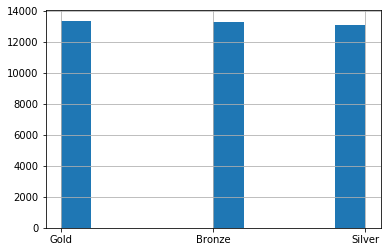

In [37]:
olympics.Medal.hist()

In [38]:
pysqldf("SELECT Sex, COUNT(*) AS COUNT FROM olympics WHERE Sex != 'Nan'GROUP BY Sex ORDER BY Sex DESC")

,Sex,COUNT
0,M,196594
1,F,74522


This hypothesis is proven wrong from the data shown above, there is more male participants than females.

## 5. There is lower percentage of the gold medallists from South Asian countries.

This hypothesis is proven correct from question 1. The percentage of South Asian coutries to win a medal is 0.81% and to win a gold medal is 1.35%. United State has won 18.5% of gold medals over the years overall. It is more than all the gold medal percentage from the South Asian Coutries.

## 6. The country to win highest number of medals will be USA.

calculations for the countries to win a gold medal is as below.

In [43]:
pysqldf("SELECT Team, COUNT(*) AS Gold_medal_count FROM olympics GROUP BY 1 HAVING Medal IN ('Gold') ORDER BY 2 DESC")

,Team,Gold_medal_count
0,Unified Team,832
1,Cameroon,312
2,Switzerland-1,125
3,East Germany-1,48
4,Union des Socits Franais de Sports Athletiques,29
...,...,...
97,Elvis Va,1
98,Cicely-1,1
99,Carabinier-15,1
100,Camille,1


Calculations for countries win any medals is as below.

In [44]:
pysqldf("SELECT Team, COUNT(*) AS medal_count FROM olympics GROUP BY 1 HAVING Medal IN ('Gold','Silver','Bronze') ORDER BY 2 DESC")

,Team,medal_count
0,Italy,10260
1,Australia,7513
2,Hungary,6547
3,Switzerland,5844
4,Russia,4922
...,...,...
293,Cicely-1,1
294,Carabinier-15,1
295,Camille,1
296,Brynhild-2,1


The partipants count from each coutry is as below.

In [45]:
pysqldf("SELECT Team, COUNT(*) FROM olympics GROUP BY 1 ORDER BY 2 DESC")

,Team,COUNT(*)
0,United States,17847
1,France,11988
2,Great Britain,11404
3,Italy,10260
4,Germany,9326
...,...,...
1179,Baby-9,1
1180,Augsburg,1
1181,Ariette-8,1
1182,Angerburg,1


From the calculation is it proven that the hyopothesis is wrong. The country to win highest number of medals is Intaly with 10260. The highest countries are Intaly, Austrailia and Hungary.
However the highest number of Gold medals and highest number of participants are from United States.

## Correlation Coefficient calculations 

In [54]:
correlations = olympics.corr()
correlations = correlations["Height"]
print(correlations)

ID       -0.011141
Age       0.138246
Height    1.000000
Weight    0.796213
Year      0.047578
Name: Height, dtype: float64


In [55]:
correlations = olympics.corr()
correlations = correlations["Weight"]
print(correlations)

ID       -0.009176
Age       0.212069
Height    0.796213
Weight    1.000000
Year      0.019095
Name: Weight, dtype: float64


In [52]:
correlations = olympics.corr()
correlations = correlations["Age"]
print(correlations)

ID       -0.003631
Age       1.000000
Height    0.138246
Weight    0.212069
Year     -0.115137
Name: Age, dtype: float64


In [56]:
correlations = olympics.corr()
correlations = correlations["Year"]
print(correlations)

ID        0.011885
Age      -0.115137
Height    0.047578
Weight    0.019095
Year      1.000000
Name: Year, dtype: float64


The correlation coefficient was calculated between the numerical columns (Age, Weight, Height and Year).
There is a positive correlation between Height and Weight columns with the correlation coefficient of 0.796.  Other column correlation coefficients are close to zero. Therefore there is no other correlation between other numeric columns.

## Further Analysis

Further analysis was done using scatter plot to see the relationships of the coulmns

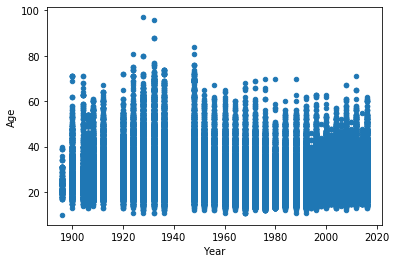

In [57]:
olympics.plot.scatter(x="Year", y = "Age")

From the above diagram 2 outliers can be seen within the age 90 to 100.

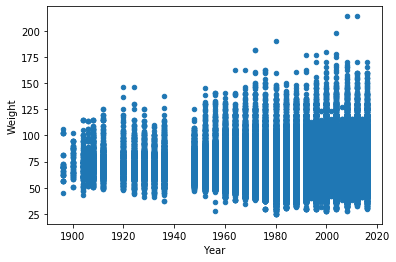

In [58]:
olympics.plot.scatter(x="Year", y = "Weight")

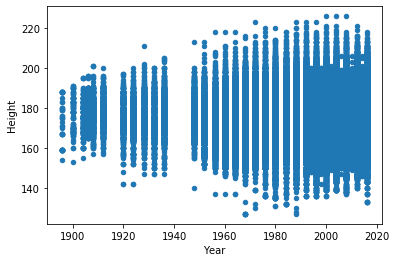

In [59]:
olympics.plot.scatter(x="Year", y = "Height")

Futher analysis was done to see the games held in different seasons.

In [49]:
pysqldf("SELECT Sport, Event, COUNT(*) AS sports_count FROM olympics WHERE Season = 'Winter' GROUP BY Sport, Event ORDER BY 3 DESC")

,Sport,Event,sports_count
0,Ice Hockey,Ice Hockey Men's Ice Hockey,4702
1,Bobsleigh,Bobsleigh Men's Four,1715
2,Alpine Skiing,Alpine Skiing Men's Slalom,1593
3,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1535
4,Alpine Skiing,Alpine Skiing Men's Downhill,1164
...,...,...,...
114,Freestyle Skiing,Freestyle Skiing Women's Halfpipe,23
115,Snowboarding,Snowboarding Women's Slopestyle,23
116,Speed Skating,Speed Skating Men's Allround,23
117,Freestyle Skiing,Freestyle Skiing Women's Slopestyle,22


In [50]:
pysqldf("SELECT Sport, Event, COUNT(*) AS sports_count FROM olympics WHERE Season = 'Summer' GROUP BY Sport, Event ORDER BY 3 DESC")

,Sport,Event,sports_count
0,Football,Football Men's Football,5733
1,Hockey,Hockey Men's Hockey,3958
2,Water Polo,Water Polo Men's Water Polo,3358
3,Basketball,Basketball Men's Basketball,3280
4,Cycling,"Cycling Men's Road Race, Individual",2947
...,...,...,...
646,Archery,"Archery Men's Target Archery, 50 metres, Indiv...",2
647,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,2
648,Croquet,Croquet Mixed Doubles,2
649,Sailing,Sailing Mixed 18 foot,2


In [60]:
pysqldf("SELECT Age, Sport, Event, Team, Year FROM olympics WHERE Age > 90")

,Age,Sport,Event,Team,Year
0,96.0,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",United States,1932
1,97.0,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",United States,1928


## Discuss insights discovered

There is a linear relationship with the number of participants with the year from the histogram created, as the year’s increase the number of participants also increase. It is learned that with time more countries are taking part in Olympics and participants from each country is increasing.

The average of height and weight should be calculated for sports and events seperately. The participants heights and weight will vary according to the sports that their doing.

It was shown from the graph that 1920 to 1940 there were participants with higher age. There are 2 outlier points age between 90 to 100. After further analysis, the two participants were from United States, for Art competition, age 96 and 97 from the year 1932 and 1928.

From the data analysis it is also clear that in winter most of the events are winter games and in Summer its other field games



## Recommendations and Actions

* There is lower percentage of participants from South Asian Countries and as a result lower medalists. sports can be advertised more in these countries and to give more facicitilies and opening more opportunites to take part in Olympics. 

* From the data it is shown 2 participant age 96 and 97 taking part in Art Cometitions. This indicates that age is no barrier to take part in Olympics and this can be promoted specialy in South Asian Countries.

* In the sports manifacturing garment industry they can export more products to Unites States. Based on the analysis there will be more demand for male garment sports wear for olymic than female sports wear.

* The hight and the weight can be taken in to consideration when designing the sports wear.

* There is more participants for summer than winter.
